# Final Project CSCI 182
## Members: Danny Bowers, Patrick Callahan, Allen Shahshahani

In [118]:
#Import the necessary library to access the Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#attach the Spotify API necessities. 
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

#This will query the top 20 tracks from the artist Milky Chance
results = sp.search(q='milky chance', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Stolen Dance
1 Cocoon
2 Flashed Junk Mind
3 Colorado
4 Tainted Love
5 Down By The River
6 Synchronize
7 Colorado
8 Unknown Song
9 Levitating
10 Don't Let Me Down
11 Save Your Tears
12 Daydreaming
13 Fairytale
14 Love Again
15 Sweet Sun
16 The Game
17 Blossom
18 La Noche De Anoche
19 Cold Summer Breeze


In [119]:
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Kashmir - Remaster
audio    : https://p.scdn.co/mp3

# Where the Project Begins

In [155]:
import spotipy
import sys
import spotipy.util as util

# Add the tokens necessary to use the Spotify API
username = 'connor19802'
SPOTIPY_CLIENT_ID = 'd7ab2112e221473a8b2a7a88c1aac45e'
SPOTIPY_CLIENT_SECRET = 'fde374bcf24947c1812412a474d3ef94'
SPOTIPY_REDIRECT_URI='http://localhost:8080/callback'

In [156]:
# Authenticate the user and make the scope capable of reading the top values for the authenticated user
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)
sp = spotipy.Spotify(auth=token)

In [157]:
import pandas as pd


top_liked_song_names = sp.current_user_top_tracks(limit=50) #Get the top 50 songs of the user
top_liked_song_id = {}
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']

audio_features_list = []
#make a list of the audio features of those top 50 songs
for song, id in top_liked_song_id.items():
    audio_track_info = sp.audio_features(id)
    audio_features_list.append(audio_track_info)

print(top_liked_song_id)


{'26': '1SqAcHRKodDP1mxvAqkCvU', 'All That and More (Sailboat)': '6vyFAHVKIsp3pdyhlOKMAz', 'All the Debts I Owe': '6255IIBwKySv6RYrOeHfQh', 'Next to You': '3MwHZDGwAR8RjZZBriBqmx', 'Pepas': '5fwSHlTEWpluwOM0Sxnh5k', 'Come Away': '1tpSOLApZSgDaFqYHIeQl9', 'Feathered Indians': '2tgQaL85WoRfgEa4hFQgrE', 'Roll The Bones - Audiotree Live Version': '1Yxbxg5R6dQcYmOdjvlXP0', 'Here I Am': '2yVhdgjCt0T2keTR1YlKEp', 'heartbeat': '78MI46vAPFoPkLBJSgYADP', 'Wiseman': '5lCRPA4XEg4VPbNu0lDHBA', 'La Mar': '2qrVYBy2PArMwQRVZxFWzz', 'Rubble To Rubble': '3o5K1YmFz9i9KluRGJusd1', 'Silver Lining': '0i5QVxsK3IvEDbUjTA64Li', 'Lose Yourself': '77Ft1RJngppZlq59B6uP0z', 'Long Nights': '4lxGVzcUaSF5HW5jtWnShV', 'Do It To It': '20on25jryn53hWghthWWW3', 'Lost in the Cold': '6UqjaI4yIo2uA0kA6ej8ui', 'Interior Crocodile Alligator': '6OfMguZO7yQBFquseyKVRm', 'Vagabond': '3HAgxyWGeJtIVabS2mTREt', 'Tainted Love': '1wAPbQ5XjbZqPl0WDl5mHH', 'Right Me Up': '2f5m5MB4H5wRS5iu7oee1Q', 'Jiggle It - Album Version (Edited)': '

In [158]:
#Add the song names to those dictionaries so we know what songs have which features
for i in audio_features_list:
    for song in top_liked_song_id.keys():
        i[0]['Song_Name'] = song
        del top_liked_song_id[song]
        break
 

In [159]:

list_audio_ = []
#clean up the list because it had nested lists with single dictionaries within each nested list. Instead make it one list of dictionaries
for i in audio_features_list:
    for j in i: 
        list_audio_.append(j)

#Create dataframe off those features
df = pd.DataFrame(list_audio_)
#Process which audio data will be necessary and delete the uneseccary data from the datafram
del df['uri']
del df['track_href']
del df['analysis_url']
del df['type']
del df['time_signature']
del df['mode']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Song_Name
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,1SqAcHRKodDP1mxvAqkCvU,235416,26
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,6vyFAHVKIsp3pdyhlOKMAz,171025,All That and More (Sailboat)
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,6255IIBwKySv6RYrOeHfQh,193049,All the Debts I Owe
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,3MwHZDGwAR8RjZZBriBqmx,256520,Next to You
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,Pepas


In [160]:
import matplotlib.pyplot as plt
import numpy as np


In [161]:
audio_analysis_list = {}
#make a list of the audio analysis of those top 50 songs
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']
    
for i in top_liked_song_id:
    audio_analysis_list[i] = []
for song, id in top_liked_song_id.items():
    count = 0
    audio_track_info = sp.audio_analysis(id)
    while count < (len(audio_track_info['segments'])-1):
        audio_analysis_list[song].append(audio_track_info['segments'][count]['pitches'])
        count+=1

In [162]:
# Print the pitch segments for each songs
length_of_pitch_segments = []
for i in audio_analysis_list:   
    length_of_pitch_segments.append(len(audio_analysis_list[i]))

In [163]:
#add it to the dataframe
print(length_of_pitch_segments)
df['pitches'] = length_of_pitch_segments
df.head()
user_songs_df = df

[861, 646, 717, 744, 1206, 851, 807, 987, 1060, 958, 526, 855, 682, 616, 1336, 448, 816, 958, 517, 513, 647, 901, 970, 804, 436, 532, 701, 1071, 932, 731, 784, 1021, 698, 687, 976, 734, 788, 701, 704, 404, 635, 742, 471, 583, 881, 927, 1066, 503, 720, 1006]


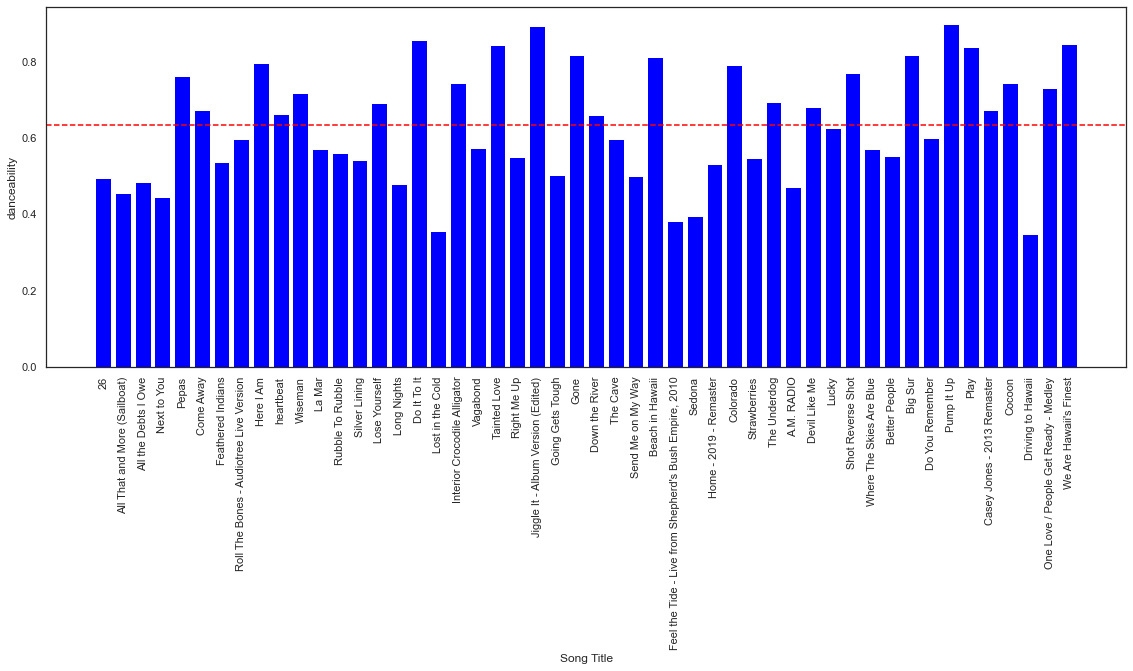

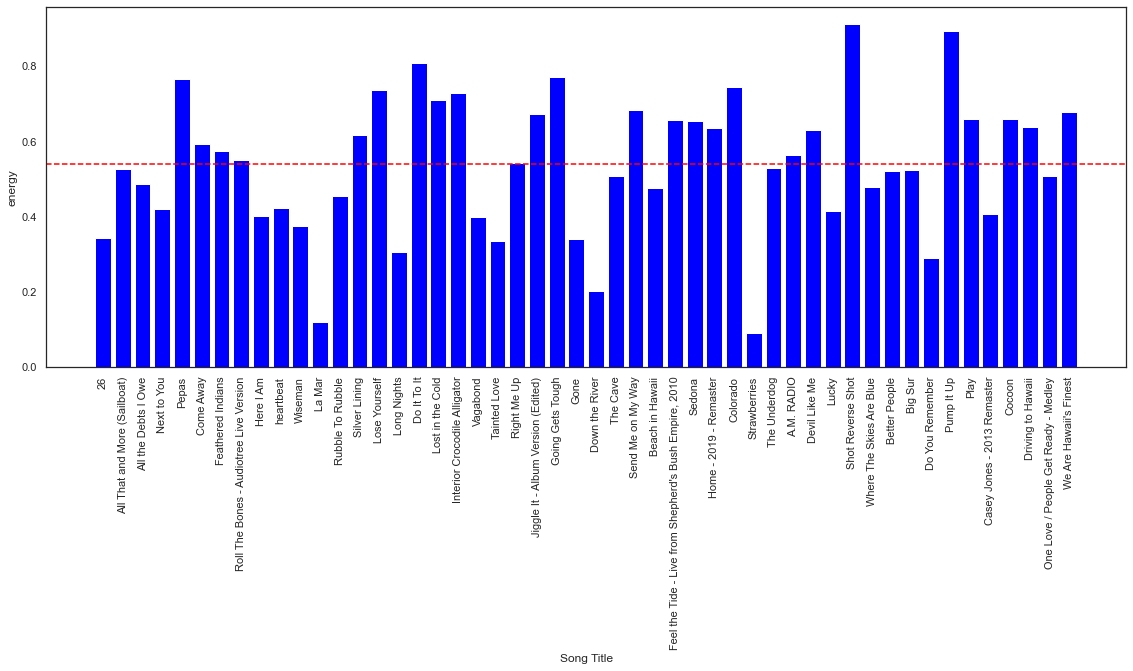

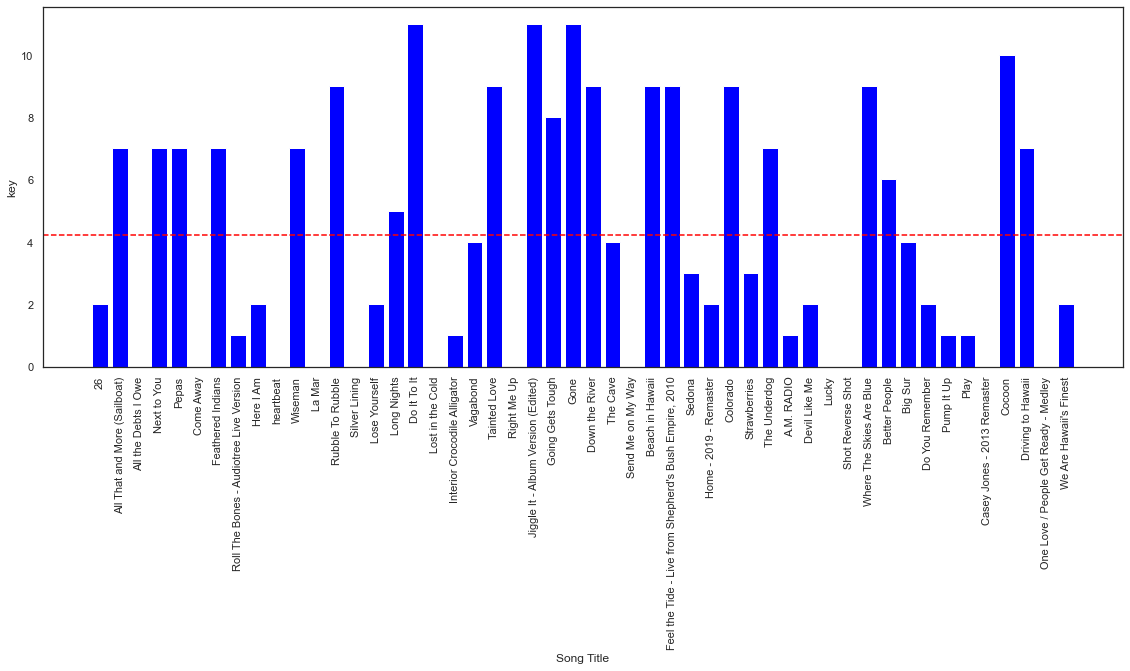

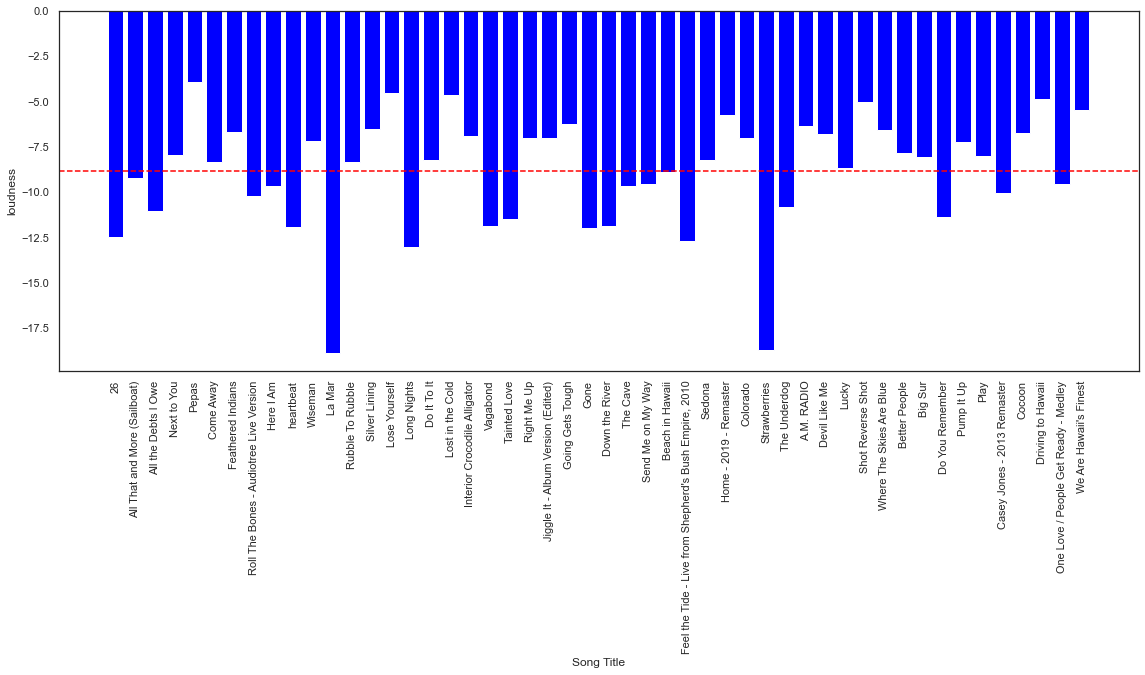

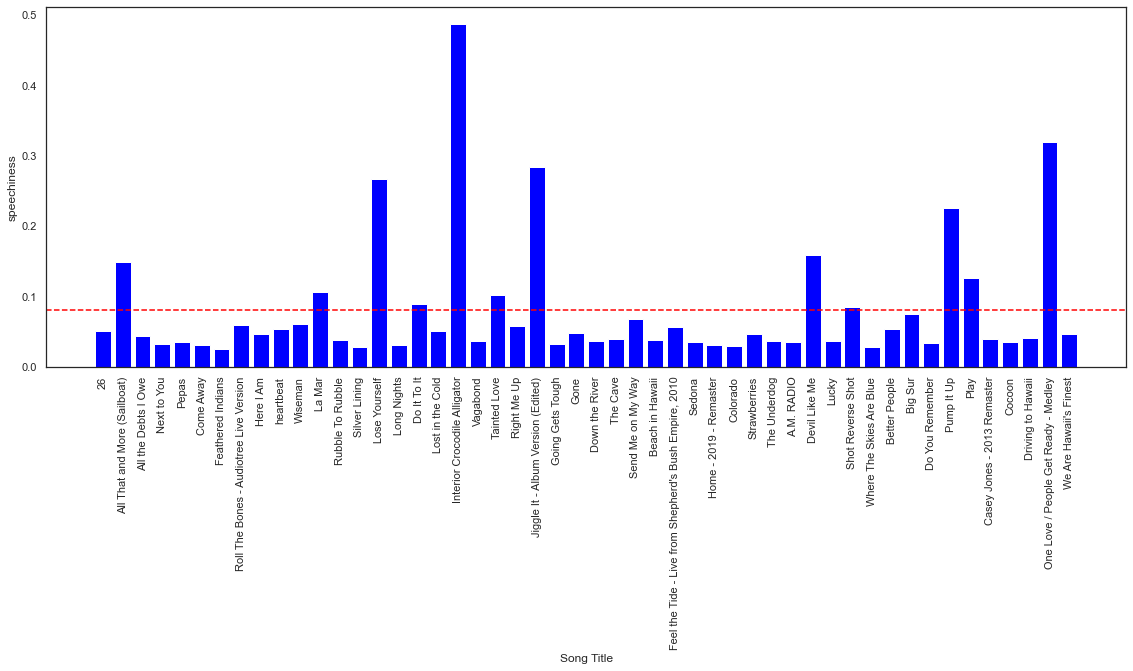

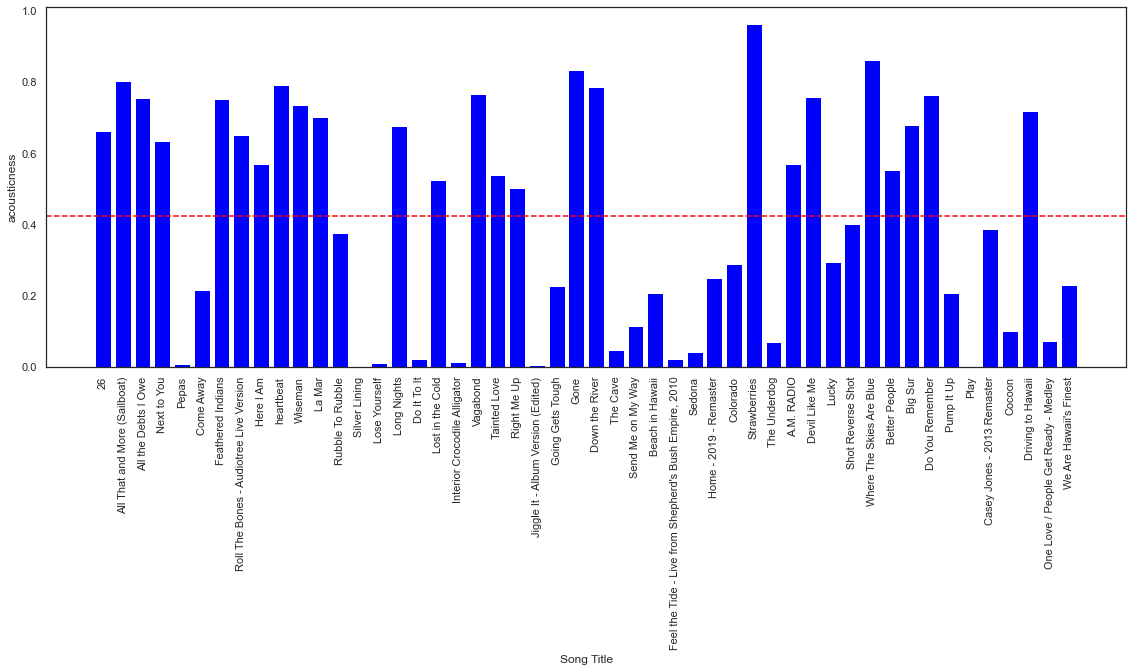

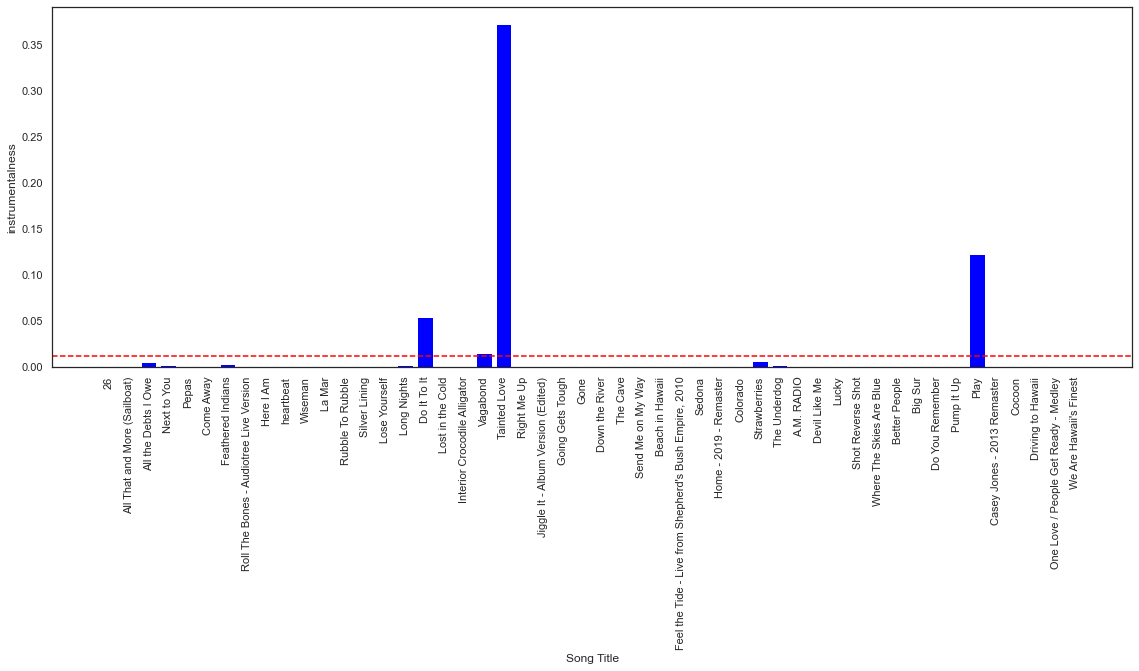

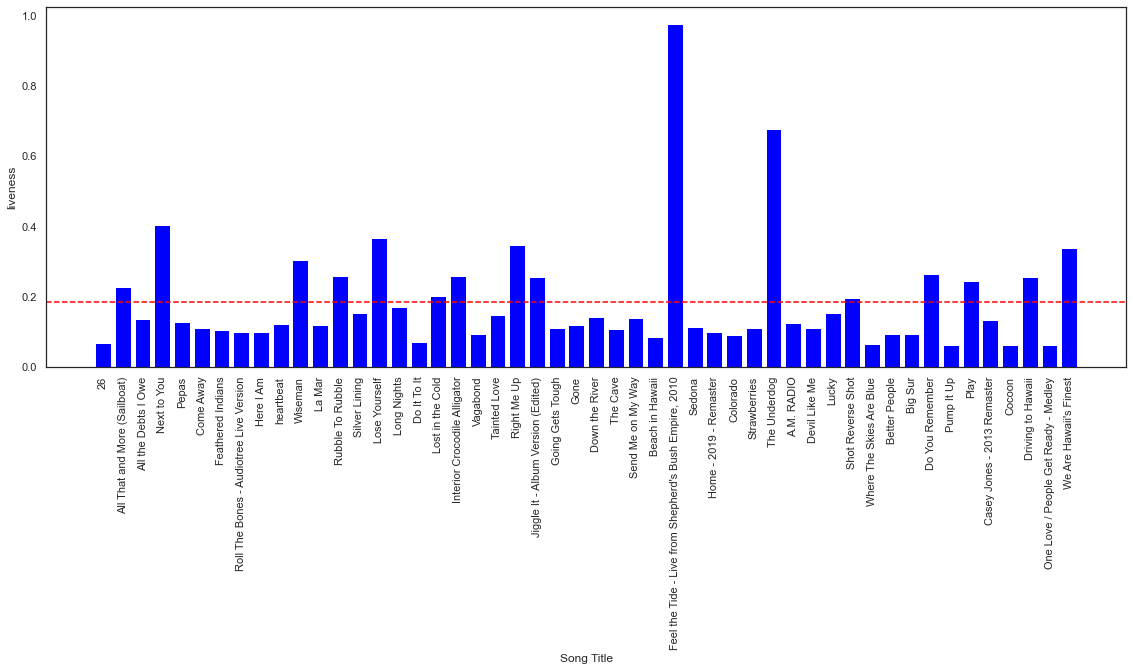

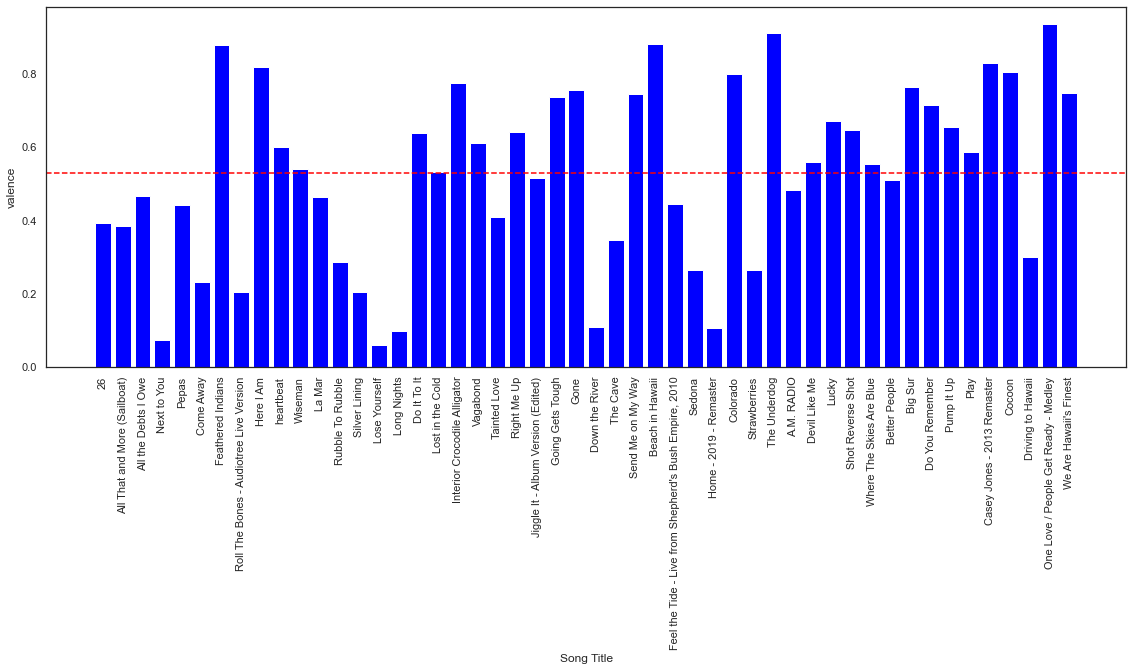

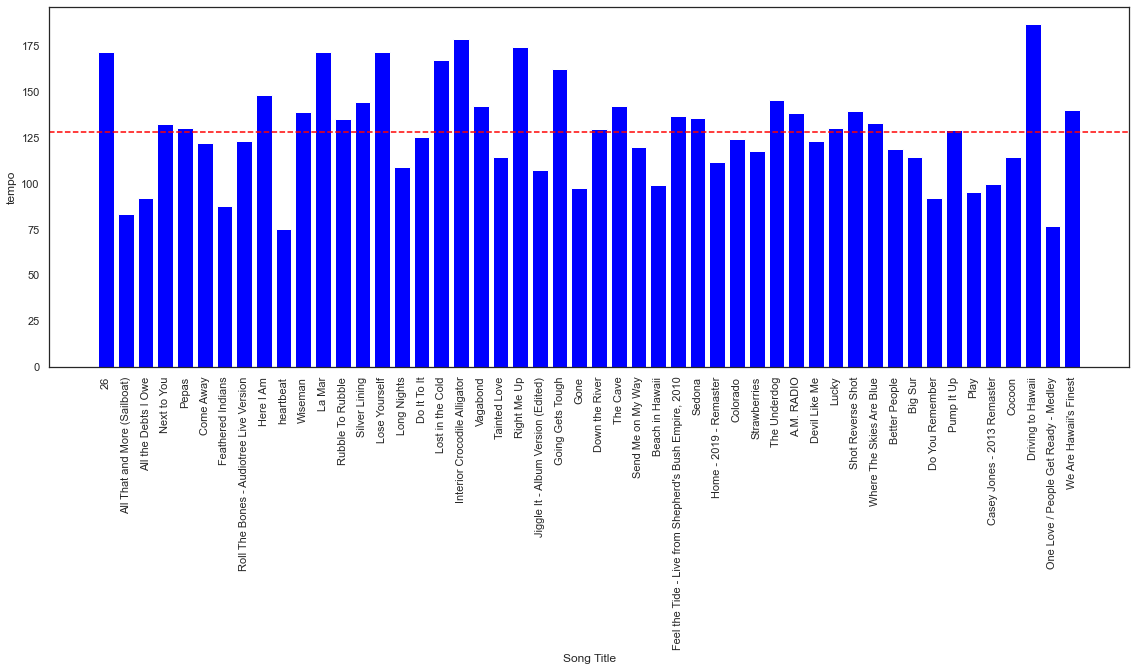

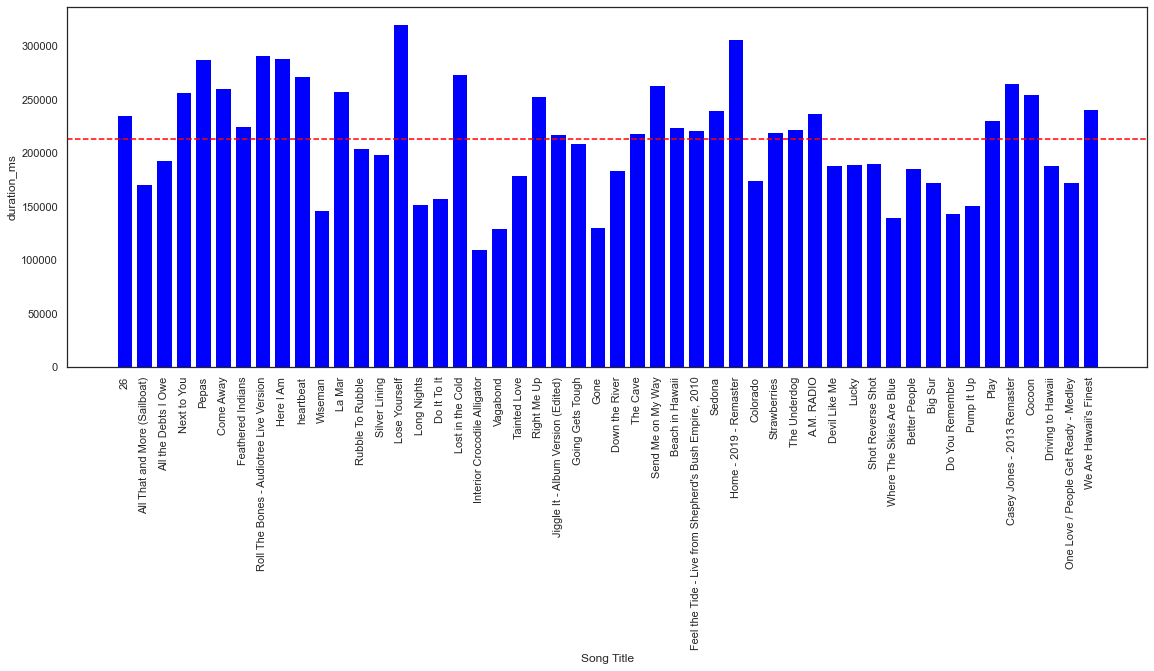

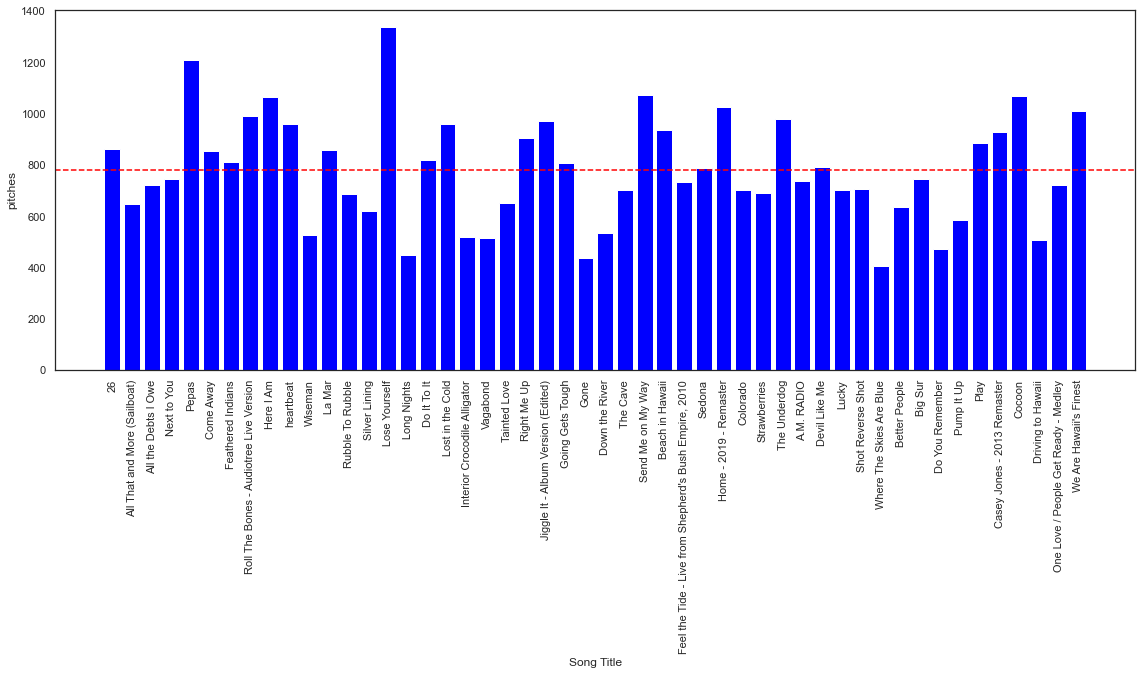

In [164]:


average_features = {}
#Function that will create a graph for each feature and song name to visualize the data. The function returns the average values for each feature. 
#This will allow us to reference which songs the user may like in the future. Because the average data is based of the top 50 songs the user listens to, 
# we can use the averages to understand which songs the user may also like. 
def makeAudioGraph(av_feats, df):
    for column in df: 
        if column != 'id' and column != 'Song_Name':
            average_y = np.average(df[column])
            fig = plt.figure(figsize=(15, 5))
            ax = fig.add_axes([0,0,1,1])
            title = df['Song_Name']
            feature = df[column]
            ax.bar(title,feature, color='blue')
            ax.set_ylabel(column)
            ax.set_xlabel('Song Title')
            plt.xticks(rotation = 90)
            plt.axhline(y= average_y,color='red', linestyle ='dashed')
            plt.show()
            print()
            av_feats[column] = average_y
            
    return av_feats

final_averages = makeAudioGraph(average_features, df)


In [165]:
from sklearn import datasets
from sklearn import preprocessing
import scipy.stats as stats
import seaborn as sns

song_names = []
ids = []
song_names = df['Song_Name']
ids  = df['id']
del df['Song_Name']
del df['id']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pitches
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,235416,861
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,171025,646
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,193049,717
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,256520,744
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,287120,1206


<AxesSubplot:>

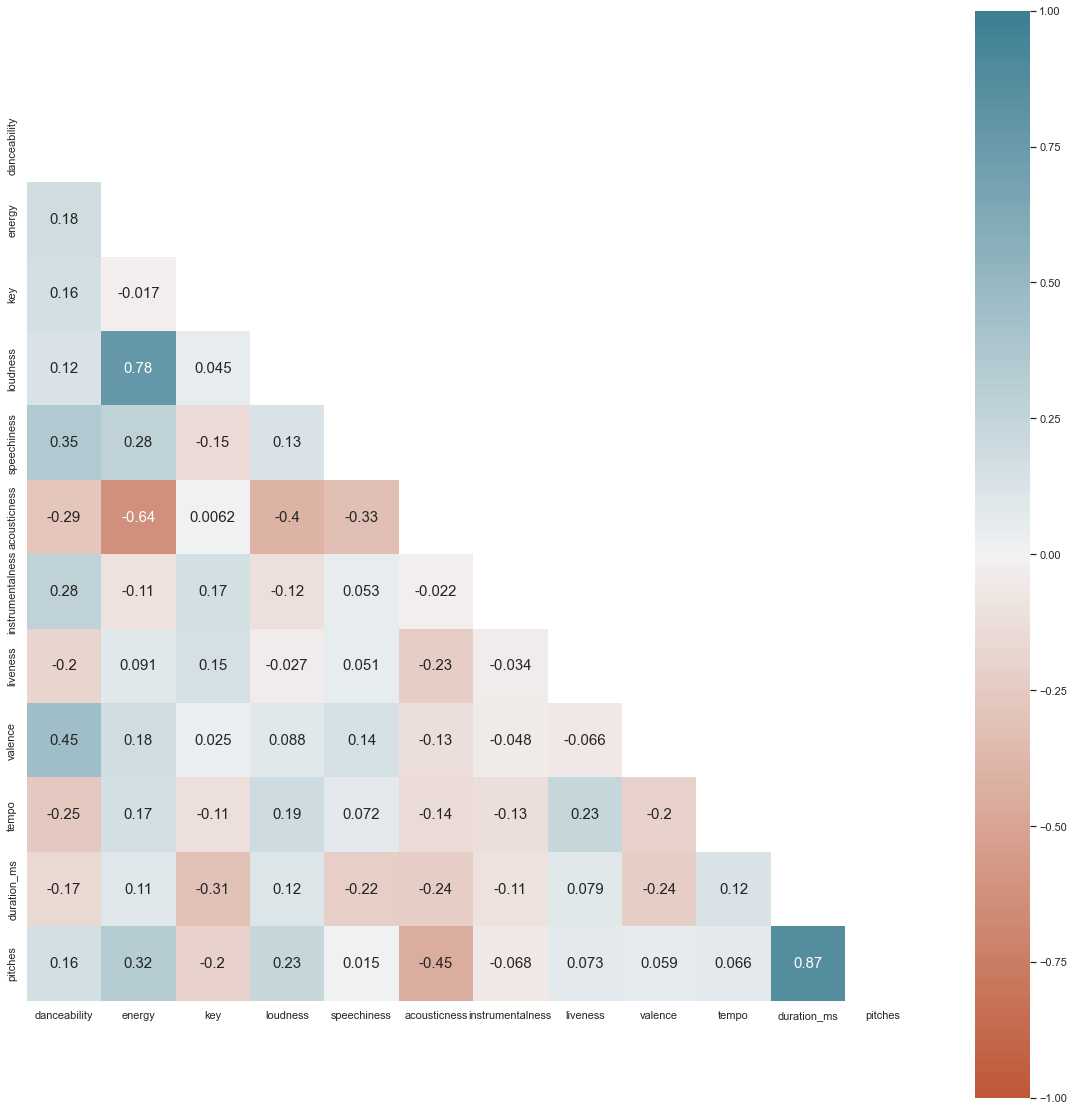

In [166]:
sns.set_theme(style="white")

tracks_correlation = df.corr()
mask = np.triu(np.ones_like(tracks_correlation, dtype=bool))

plt.subplots(figsize=(20,20))
sns.heatmap(
    tracks_correlation,
    
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=150),
    
    annot=True, annot_kws={'size': 15},
    mask = mask,
    square=True
    
)
# Looking at the correlation graph, we can see that loudness and energy are positively correlated and accousticness and energy are negatively correlated.
# Furthermore, duration and pitches is highly correlated, but this is not helpful because this is known by the understanding that the length of a song will most 
#   likely mean that the song will have more pitches. 

In [167]:
#This block of code with take out outlier songs that are not similar to the rest based on the Z-score value
song_data = []
count_ = 0
for i in song_names:
    song_data.append(count)
    count += 1

id_data = []
count_ = 0
for i in ids:
    id_data.append(count)
    count += 1

df['Song_Name'] = song_data
df['id'] = id_data

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
counter = 0
for i in filtered_entries:
    if i != True:
        del song_names[counter]
        del ids[counter]
    counter += 1

new_df = df[filtered_entries]


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30     True
31     True
32     True
33    False
34    False
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
dtype: bool


/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_6553/3725350455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Song_Name'] = song_names
/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_6553/3725350455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['id'] = ids


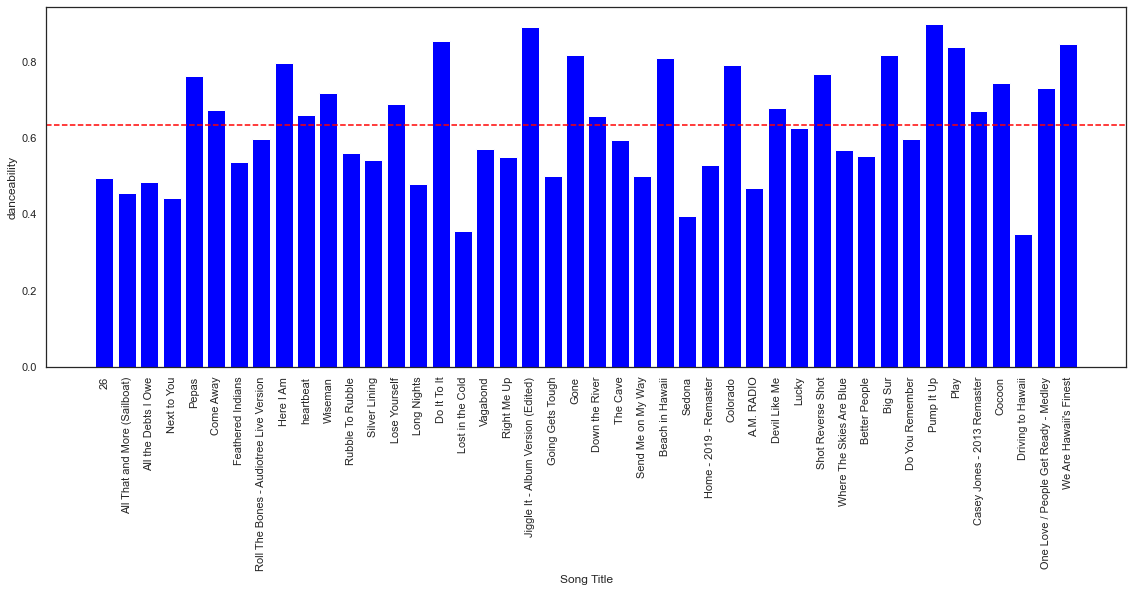

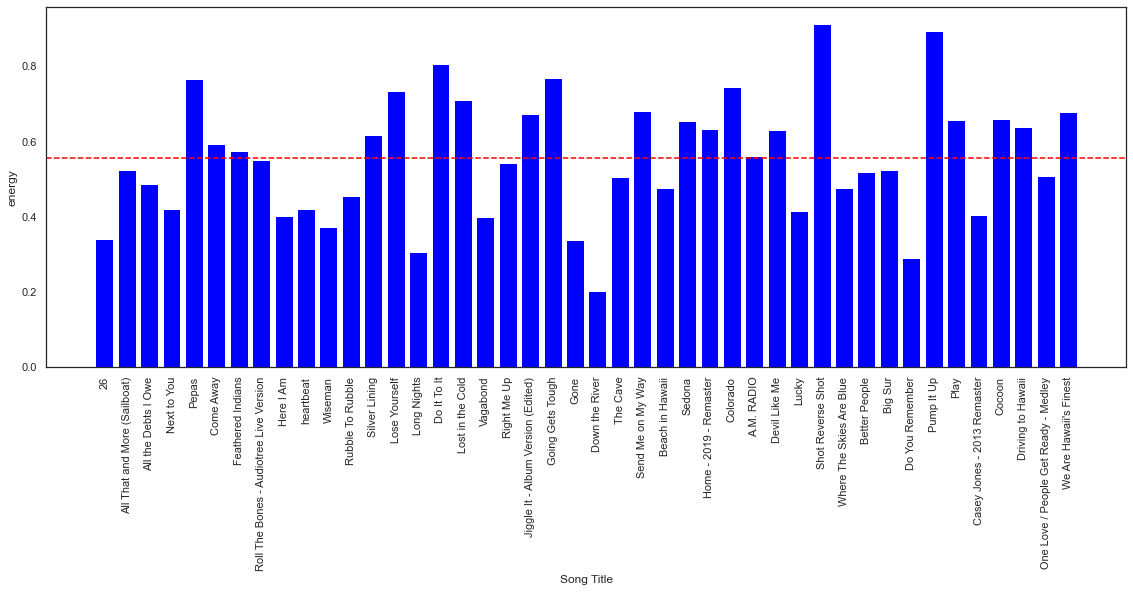

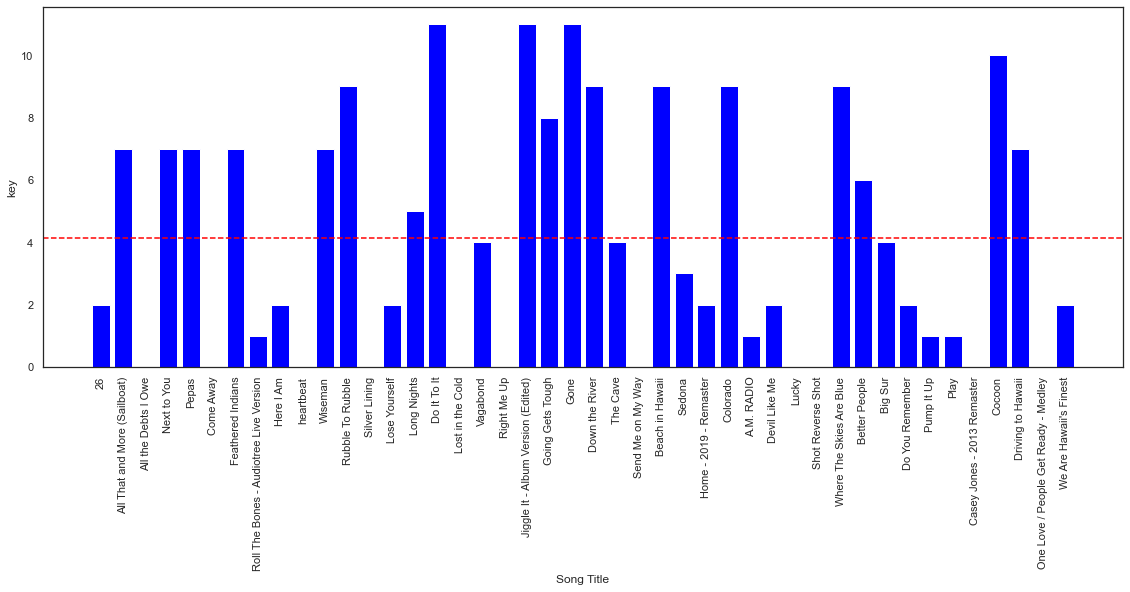

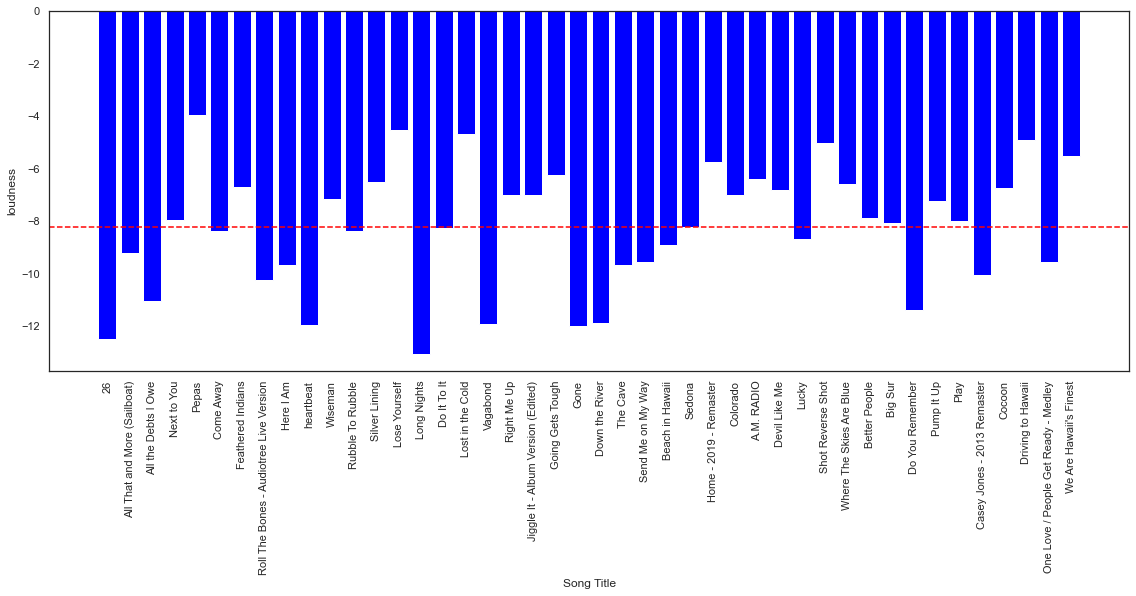

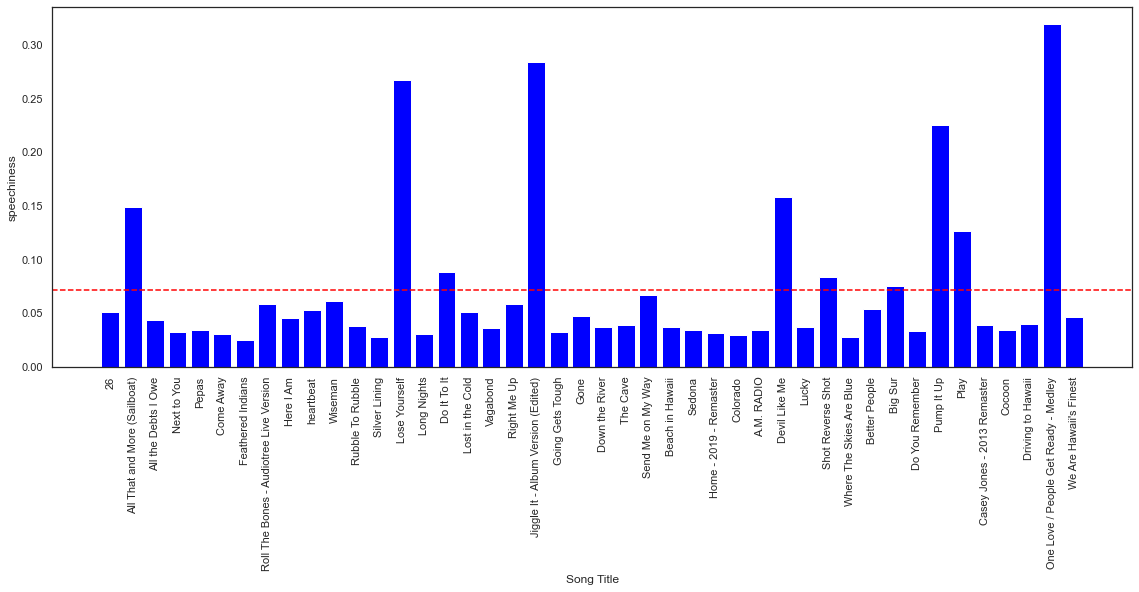

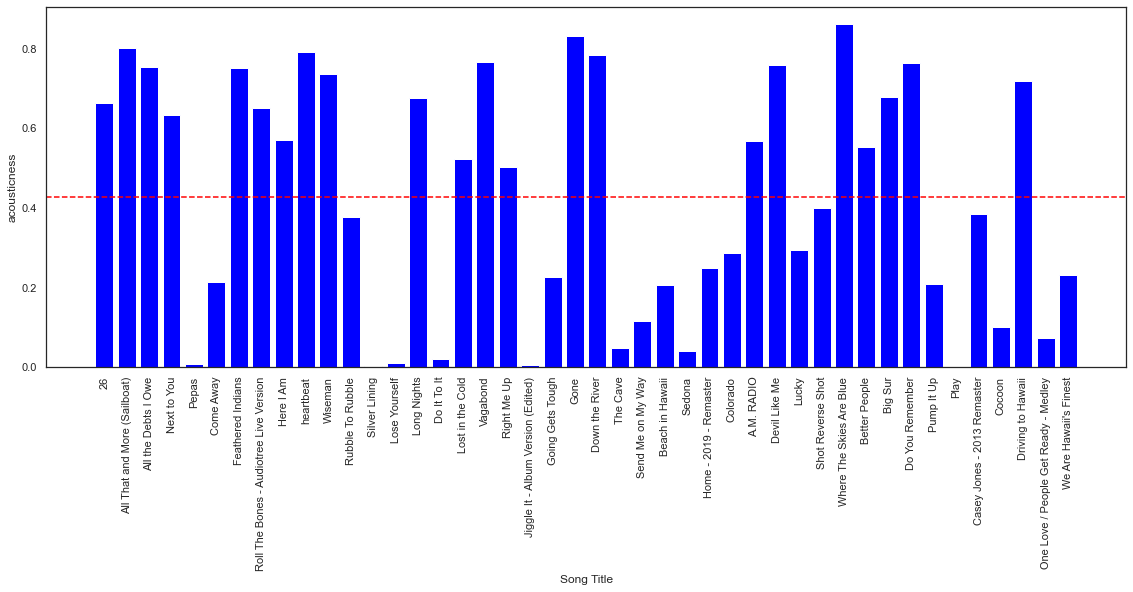

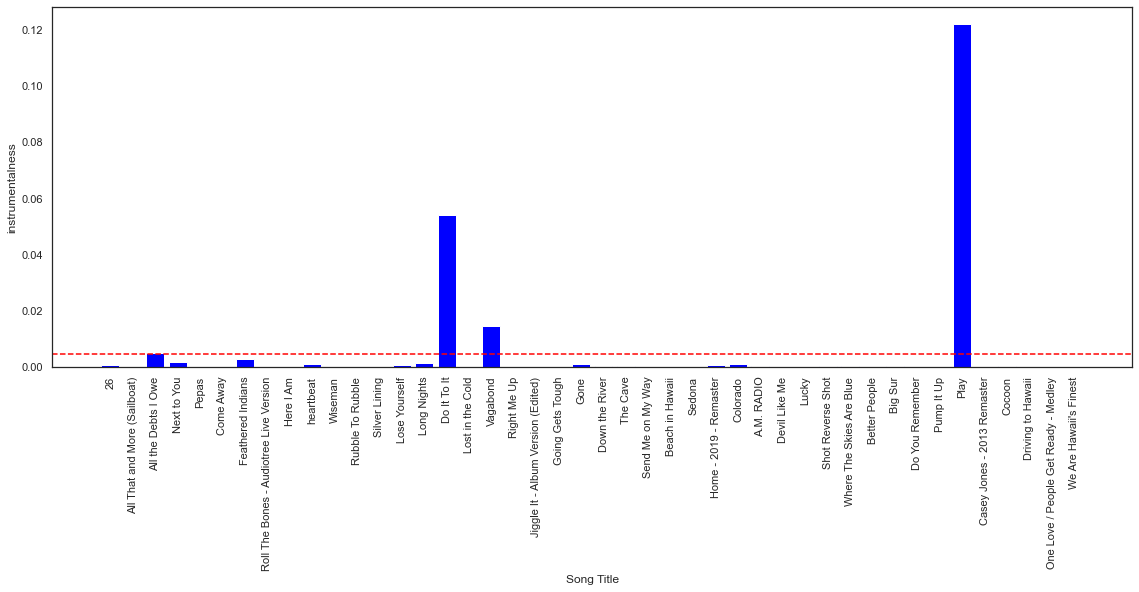

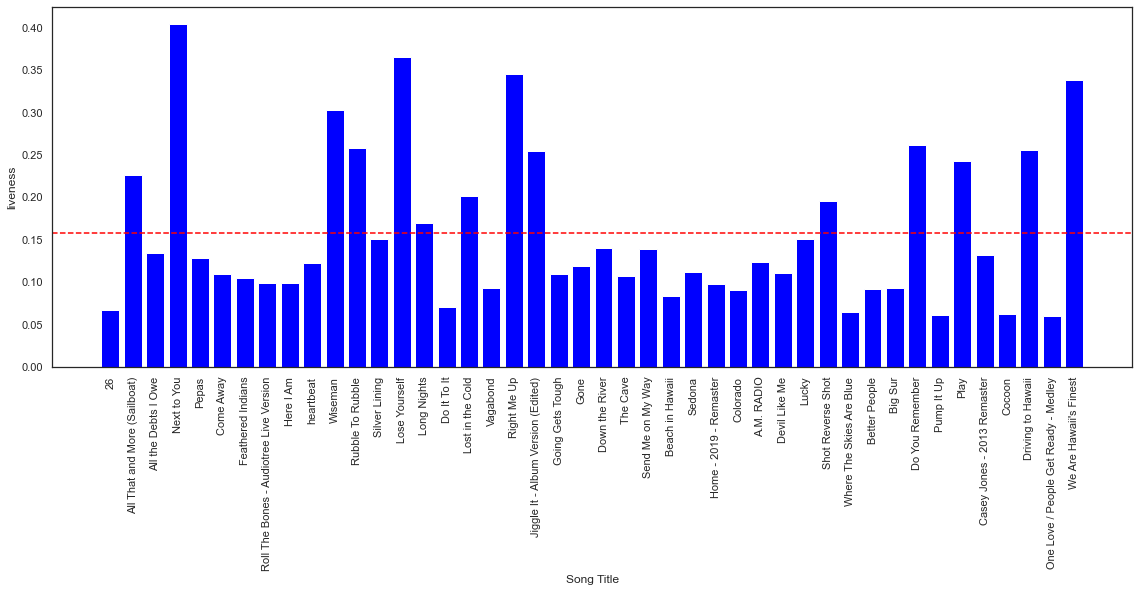

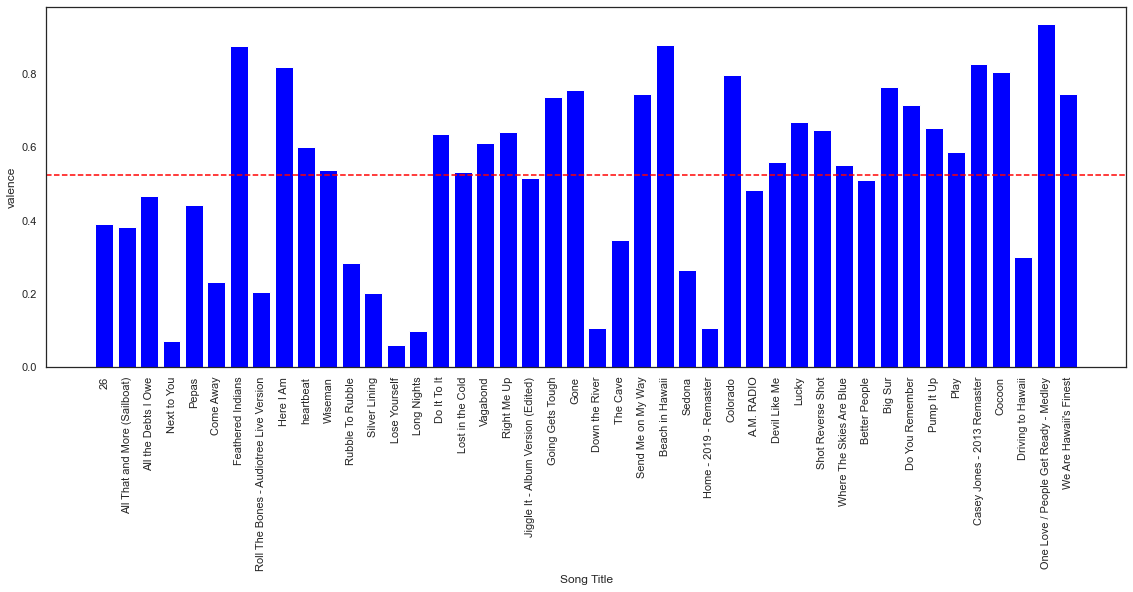

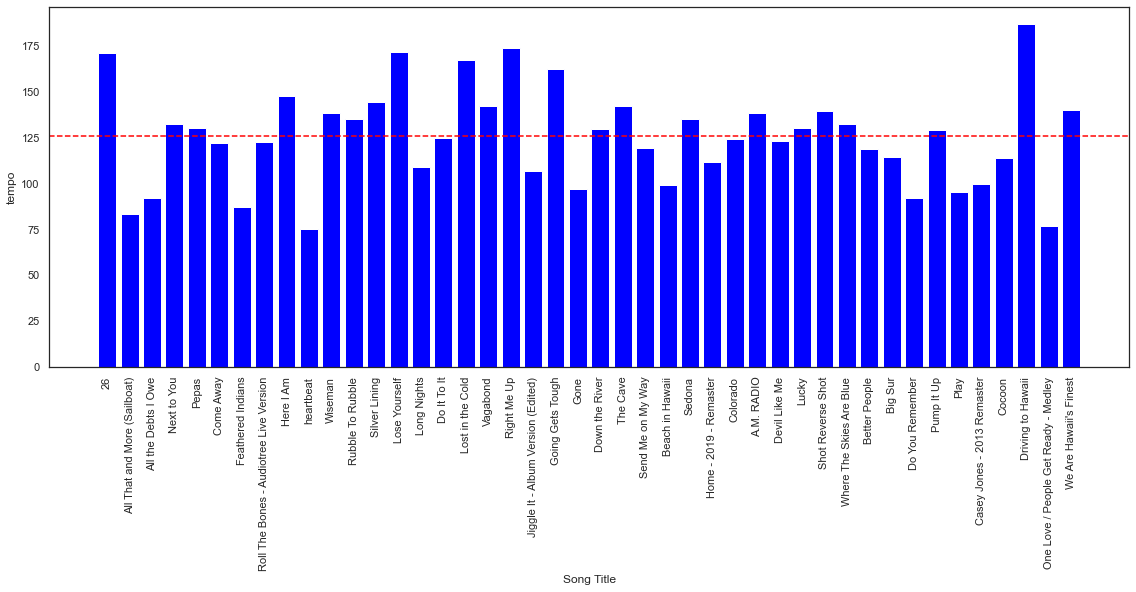

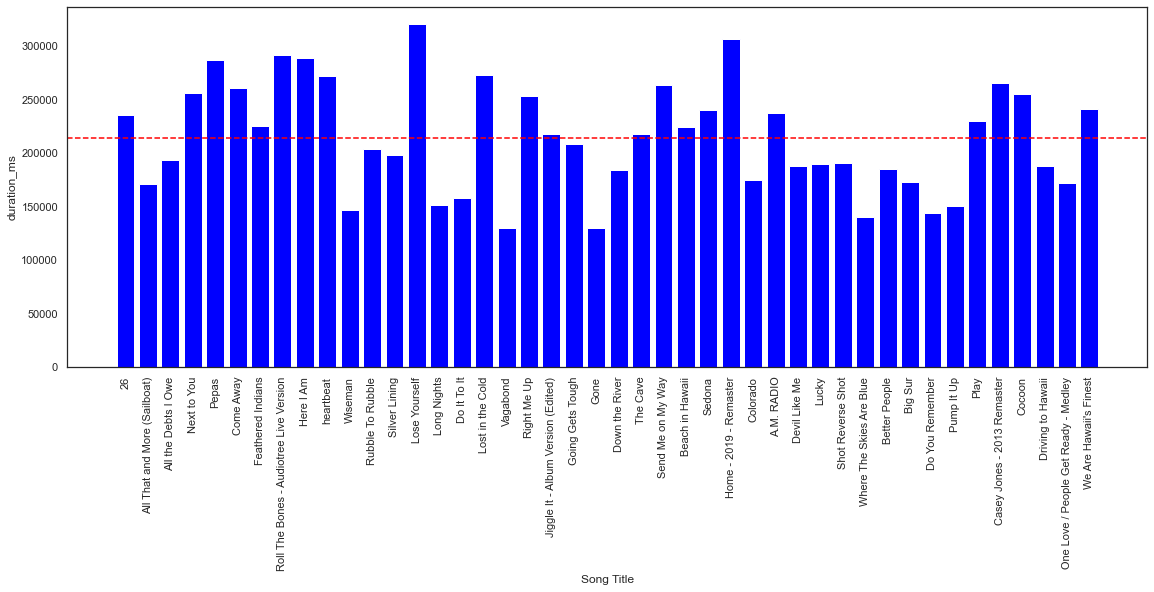

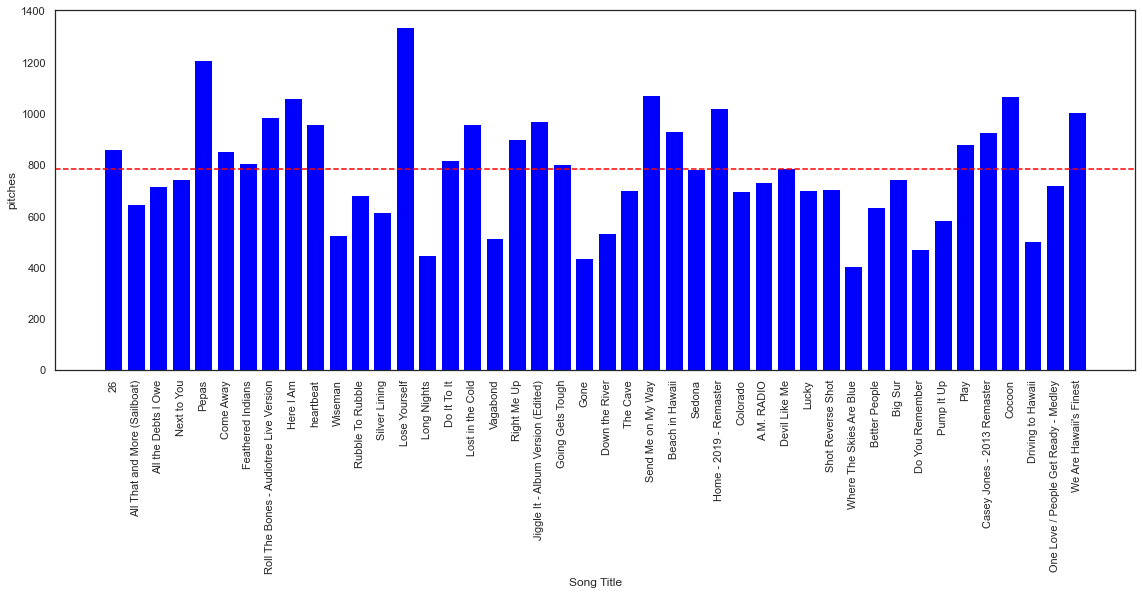


Values with outliers:
Average of:  danceability  is:  0.63246
Average of:  energy  is:  0.5381339999999999
Average of:  key  is:  4.22
Average of:  loudness  is:  -8.846499999999999
Average of:  speechiness  is:  0.079734
Average of:  acousticness  is:  0.42232686
Average of:  instrumentalness  is:  0.0117765138
Average of:  liveness  is:  0.18465599999999996
Average of:  valence  is:  0.526946
Average of:  tempo  is:  127.74264
Average of:  duration_ms  is:  212863.62
Average of:  pitches  is:  777.2

Values with outliers taken out
Average of:  danceability  is:  0.6329318181818181
Average of:  energy  is:  0.55575
Average of:  key  is:  4.136363636363637
Average of:  loudness  is:  -8.241749999999998
Average of:  speechiness  is:  0.07165
Average of:  acousticness  is:  0.42755552272727276
Average of:  instrumentalness  is:  0.0047400043181818185
Average of:  liveness  is:  0.15783636363636366
Average of:  valence  is:  0.5246886363636363
Average of:  tempo  is:  125.56238636363636


In [168]:
new_df['Song_Name'] = song_names
new_df['id'] = ids
average_features = {}
wo_outliers = makeAudioGraph(average_features, new_df)

#Print the average values with outliers and average values without outliers. 
print("Values with outliers:")
for key, value in final_averages.items():
    print('Average of: ',key, ' is: ', value)
print()
print("Values with outliers taken out")
for key, value in wo_outliers.items():
    print('Average of: ',key, ' is: ', value)

In [169]:
#Now see which feature has values that are closest to the average

In [170]:
print(min(new_df['danceability']), max(new_df['danceability']))

0.348 0.898


In [171]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('loudness ~ energy', data=new_df)
model = model.fit()

loudness_predict = model.predict()

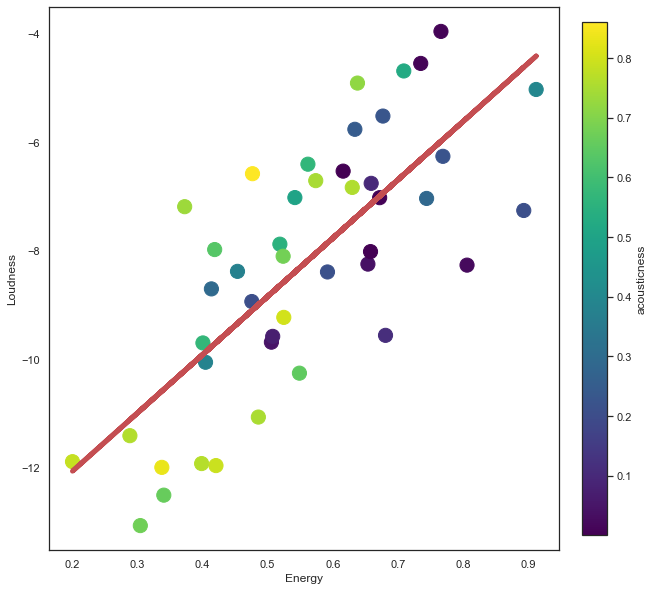

In [172]:
# This scatterplot shows that the lower the energy and the lower loudness, the song is most likely more acoustic. 

x = new_df['energy']
y = new_df['loudness']
colors = new_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.plot(new_df['energy'], loudness_predict, 'r', linewidth=5)   # regression line
plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

# Now that we have all the information we need about the user, we can start to gather all the information we need about the new releases. 
### To properly be able to make recommendations of newly released albums to the user, we need to collect the new albums, parse them by song and run audio analysis on the albums, and then finally compare which songs 10 songs have the most similar energy, loudness, and acousiticness to the top songs of the user. 
### Lastly, once this is known, we will then add the recommended songs that we have found onto a new playlist of the user's Spotify. 

In [173]:
#This block of code initializes the necessary credentials that will be used for general Spotify scraping. 
sp_albums = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

# Get the newly released albums on Spotify
new_albums = sp_albums.new_releases(country=None, limit=50, offset=0)

In [174]:
#Parse the albums by name and album id
albums_dict = {}
for i in new_albums['albums']['items']:
    if i['album_type'] != 'single':
        albums_dict[i['name']] = i['id']

In [175]:
#This block of code is necessary for creating a dictionary of albums and their tracks with the track id. 
#OUTPUT: It says "done album" when the parsing is complete. 
new_albums_tracks = {}
for key, value in albums_dict.items():
    new_albums_tracks[key] = []
for key, value in albums_dict.items():
    tracks = sp_albums.album_tracks(value, limit=50, offset=0, market=None)
    for i in tracks['items']:
        new_albums_tracks[key].append([i['name'],i['id']])
        # print()
        # print(i['name'],'-',i['id'])
        # print()
    print('done album')


done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album


In [176]:
# This is the block of code that is a test to make sure the parsing worked correctly.
# OUTPUT: It prints the amount of albums that have been gathered and the first 5 albums to show that is working properly. 
temp_count = 0
for key, value in new_albums_tracks.items():
    print('Tracks and Ids on: ', key)
    print(value)
    print()  
    temp_count += 1
    if temp_count == 5:
        break


Tracks and Ids on:  7220
[['Started From', '03cBu30KbreokkrclGPQf8'], ['Headtaps', '3HWQrKGmb05pcNoTIzzBwL'], ['AHHH HA', '2bPI4TKM4oTxl2SijUXM2J'], ['Shootout @ My Crib', '23PzodQrNGxbywlba84Rva'], ['Golden Child', '4UO8Ywh6dKZVJZ9iUofEhD'], ['No Interviews', '1tXDziDamT0we73CTDsgsv'], ['Petty Too (feat. Future)', '0VlpgNPHWCyh8xxLcaK2fp'], ['Barbarian', '6DPEzXUB3ZVzT2NDh7MkJt'], ['What Happened To Virgil (feat. Gunna)', '7ohROa13QK43JBRqfCmz4P'], ['Grow Up/Keep It On Speaker', '4AP3P2EVKANYuJk3Fi3v6Y'], ['Smoking & Thinking', '1OybHaoLAhB6biFWfaCVDw'], ['Blocklist', '79cq3PF1wgkDVTAFMlOjNB'], ['Difference Is (feat. Summer Walker)', '1qzoBWC6US7szlOsIQ1VxZ'], ['Federal Nightmares', '4W730PJT4aw79pZ9D8BLhl'], ['Love Dior Banks', '08CG6gsTUz2SMdKMycSGKZ'], ['Pissed Me Off', '0fFeockUN32c4z1bguUIQH'], ['Broadway Girls (feat. Morgan Wallen)', '2pOUHNwZJrFffS42SxPwt0']]

Tracks and Ids on:  WHO CARES?
[['KEEP IT UP', '1dxqk42KIlMyrSawZ5YjBE'], ['OPEN A WINDOW (feat. Tyler, The Creator)', 

In [177]:
# This block of code sets up functions that will be used in the future. 
# The first function check_if_all_none() checks to make sure the values in the audio analysis don't have the type 'None'. For some reason, when I did it before, a handful of the albums didn't return any audio analysis...
#   --> The function takes care of all the albums that return type 'None' if there are any and takes those out so the rest of the program can run without errors. 
def check_if_all_none(list_of_elem):
    result = True
    for elem in list_of_elem:
        if elem is not None:
            return False
    return result

# The second function takes in the all the album tracks and runs the audio analysis on all the tracks. It returns a dictionary where the key is the song id and the value are the audio features of that song. 
def albumSongFeatures(new_albums_tracks_input):
    album_features = {}
    for album, song in new_albums_tracks_input.items():
        for i in song:
            #print(i[0]," ", i[1])
            album_features[i[1]] = []
    
    for song, value in album_features.items():
        
        track_info = sp.audio_features(song) #running the audio features on the song
        checked_track_info = check_if_all_none(track_info)
        if checked_track_info == False:
            album_features[song].append(track_info)
       
    return album_features #return a dictionary with each song id and the song's audio features. 

album_song_features = albumSongFeatures(new_albums_tracks)



In [256]:
# This block of code basically turns the dictionary of audio features into a dataframe. We had to do it like this because the dictionary values were in lists. 
print(len(album_song_features)) #print the total number of songs

#initialize the dataframe
album_song_fts_df = pd.DataFrame()
album_song_fts_df['id'] = album_song_features.keys()

danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []


# add the song's features into lists that can be added to the dataframe. 
for id in album_song_fts_df['id']:
    if len(album_song_features[id]) == 0:
        danceability.append('NaN')
        energy.append('NaN')
        key.append('NaN')
        loudness.append('NaN')
        mode.append('NaN')
        speechiness.append('NaN')
        acousticness.append('NaN')
        instrumentalness.append('NaN')
        liveness.append('NaN')
        valence.append('NaN')
        tempo.append('NaN')
        duration_ms.append('NaN')
        time_signature.append('NaN')
    else:

        danceability.append(album_song_features[id][0][0]['danceability'])
        energy.append(album_song_features[id][0][0]['energy'])
        key.append(album_song_features[id][0][0]['key'])
        loudness.append(album_song_features[id][0][0]['loudness'])
        mode.append(album_song_features[id][0][0]['mode'])
        speechiness.append(album_song_features[id][0][0]['speechiness'])
        acousticness.append(album_song_features[id][0][0]['acousticness'])
        instrumentalness.append(album_song_features[id][0][0]['instrumentalness'])
        liveness.append(album_song_features[id][0][0]['liveness'])
        valence.append(album_song_features[id][0][0]['valence'])
        tempo.append(album_song_features[id][0][0]['tempo'])
        duration_ms.append(album_song_features[id][0][0]['duration_ms'])
        time_signature.append(album_song_features[id][0][0]['time_signature'])


227


In [257]:
# Add the values to the dataframe. 

album_song_fts_df['danceability'] = danceability
album_song_fts_df['energy'] = energy
album_song_fts_df['key'] = key
album_song_fts_df['loudness'] = loudness
album_song_fts_df['mode'] = mode
album_song_fts_df['speechiness'] = speechiness
album_song_fts_df['acousticness'] = acousticness
album_song_fts_df['instrumentalness'] = instrumentalness
album_song_fts_df['liveness'] = liveness
album_song_fts_df['valence'] = valence
album_song_fts_df['tempo'] = tempo
album_song_fts_df['type'] = type
album_song_fts_df['duration_ms'] = duration_ms
album_song_fts_df['time_signature'] = time_signature

album_song_fts_df

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,03cBu30KbreokkrclGPQf8,0.624,0.561,7,-8.757,1,0.476,0.089500,0.000000,0.109,0.357,159.186,audio_features,121060,4
1,3HWQrKGmb05pcNoTIzzBwL,0.562,0.609,5,-7.672,1,0.279,0.046100,0.000000,0.131,0.380,158.803,audio_features,173880,4
2,2bPI4TKM4oTxl2SijUXM2J,0.676,0.610,1,-9.185,1,0.273,0.000114,0.000002,0.191,0.519,156.005,audio_features,186538,4
3,23PzodQrNGxbywlba84Rva,0.754,0.553,10,-8.777,0,0.394,0.060000,0.000000,0.108,0.195,90.600,audio_features,153813,4
4,4UO8Ywh6dKZVJZ9iUofEhD,0.841,0.532,2,-9.307,1,0.278,0.008640,0.000002,0.268,0.319,79.993,audio_features,114580,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,79fQyEcdOTNt8fMeRqtBA8,0.798,0.578,5,-7.569,0,0.336,0.055600,0.000000,0.125,0.722,139.999,audio_features,125567,4
223,0q9RZyqkP5R1TKS6V5HJ0C,0.718,0.605,0,-8.018,1,0.380,0.080700,0.000000,0.132,0.680,159.683,audio_features,168000,4
224,7BNMzpH9CAgKVSzq1fdJDM,0.744,0.648,1,-6.846,1,0.188,0.159000,0.000000,0.125,0.534,138.046,audio_features,180870,4
225,1Ux2ogUEYjeWaatIiRh1Wo,0.857,0.712,2,-6.272,1,0.333,0.117000,0.000000,0.301,0.599,81.493,audio_features,235583,4


In [258]:
# The song names weren't in the data frame, this block of code adds them to it. 
song_name = {}
for album, songs in new_albums_tracks.items():
    for i in songs:
        song_name[i[1]] = i[0]

song_name_list = []
for i in album_song_fts_df['id']:
    for id in song_name:
        if i == id:
            song_name_list.append(song_name[id])

album_song_fts_df['Song_Name'] = song_name_list
            


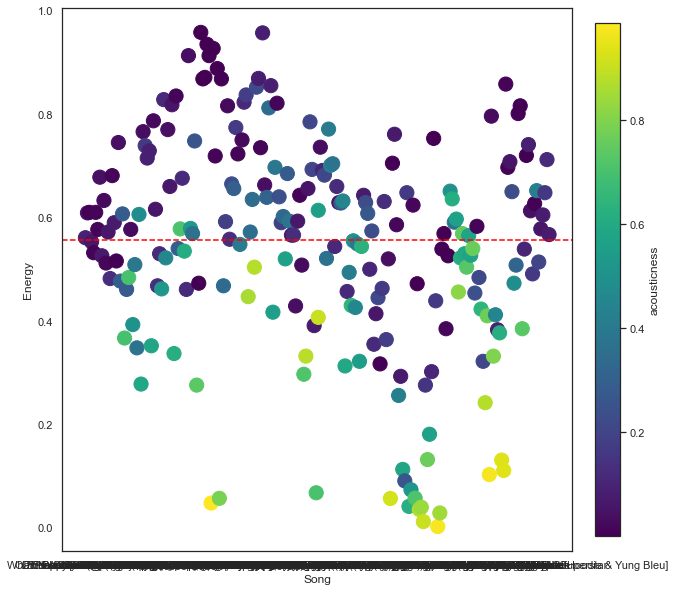

In [259]:
# This block of code plots the energy of the songs in the new released albums
# The red-dashed like is the average energy of the top listened to songs of the user

album_song_fts_df

y = album_song_fts_df['energy']
x = album_song_fts_df['Song_Name']
colors = album_song_fts_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Song')
plt.ylabel('Energy')
plt.axhline(y= wo_outliers['energy'],color='red', linestyle ='dashed')
plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

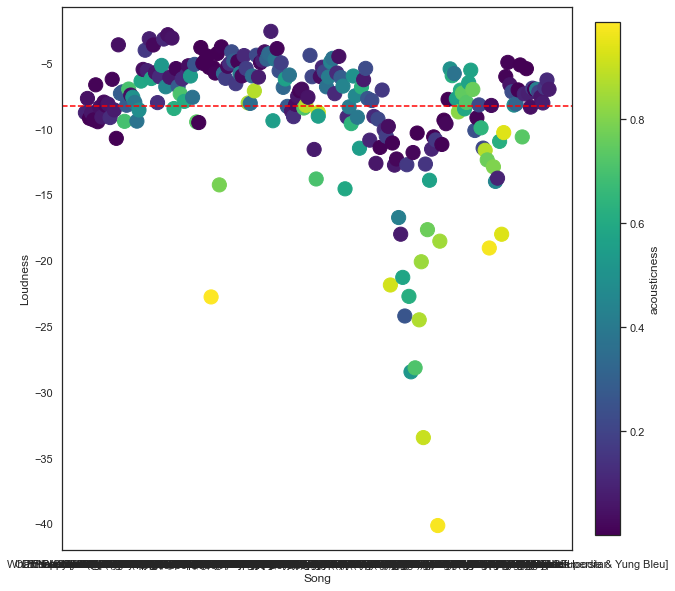

In [260]:
# This block of code plots the loudness of the songs in the new released albums
# The red-dashed like is the average loudness of the top listened to songs of the user

y = album_song_fts_df['loudness']
x = album_song_fts_df['Song_Name']
colors = album_song_fts_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Song')
plt.ylabel('Loudness')
plt.axhline(y= wo_outliers['loudness'],color='red', linestyle ='dashed')
plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

In [261]:
# This block of code is testing the similarity of loudness, energy level, and acousticness of the new released songs to the average of each feature. 
# It stores the values in lists as either 1, it is similar, or 0, it is not similar

similar_loudness = []
similar_acousticness = []
similar_energy = []

for i in album_song_fts_df['loudness']:
    if abs(i-wo_outliers['loudness']) < 1: 
        similar_loudness.append(1)
    else: 
        similar_loudness.append(0)

for i in album_song_fts_df['acousticness']:
    if abs(i-wo_outliers['acousticness']) < .1: 
        similar_acousticness.append(1)
    else: 
        similar_acousticness.append(0)

for i in album_song_fts_df['energy']:
    if abs(i-wo_outliers['energy']) < .1: 
        similar_energy.append(1)
    else: 
        similar_energy.append(0)

In [262]:
# Next, we put those lists into a dataframe

similar_data_df = pd.DataFrame(columns=['similar_loudness', 'similar_acousticness', 'similar_energy'])
similar_data_df['similar_loudness'] = similar_loudness
similar_data_df['similar_acousticness'] = similar_acousticness
similar_data_df['similar_energy'] = similar_energy

In [263]:
# The purpose of putting them into a data frame was so we could sum the values of each one and if each song fell in the similar range, the sum value would be 3 so we know that that song had similar acousticness, energy, and loudness
#   --> as the top songs of the user
 
similar_data_df = similar_data_df.transpose()
similar_totals = []
for i in similar_data_df: 
    similar_totals.append(sum(similar_data_df[i]))

In [264]:
# This was to see how many matches there were. Out of the number of new released songs, the number of "It's a match!" that is outputted is the number of songs that will be recommended to the user. 

for i in similar_totals:
    if i == 3: 
        print("It's a match!")

It's a match!
It's a match!
It's a match!
It's a match!
It's a match!
It's a match!
It's a match!


In [267]:
# This block of code adds that list of recommend value to the original dataframe. 

album_song_fts_df['Recommend_Value'] = similar_totals
final_recommended_dataFrame = album_song_fts_df
del final_recommended_dataFrame['danceability']
del final_recommended_dataFrame['key']
del final_recommended_dataFrame['mode']
del final_recommended_dataFrame['duration_ms']
del final_recommended_dataFrame['time_signature']
del final_recommended_dataFrame['tempo']
final_recommended_dataFrame

,id,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,type,Song_Name,Recommend_Value
0,03cBu30KbreokkrclGPQf8,0.561,-8.757,0.476,0.089500,0.000000,0.109,0.357,audio_features,Started From,2
1,3HWQrKGmb05pcNoTIzzBwL,0.609,-7.672,0.279,0.046100,0.000000,0.131,0.380,audio_features,Headtaps,2
2,2bPI4TKM4oTxl2SijUXM2J,0.610,-9.185,0.273,0.000114,0.000002,0.191,0.519,audio_features,AHHH HA,2
3,23PzodQrNGxbywlba84Rva,0.553,-8.777,0.394,0.060000,0.000000,0.108,0.195,audio_features,Shootout @ My Crib,2
4,4UO8Ywh6dKZVJZ9iUofEhD,0.532,-9.307,0.278,0.008640,0.000002,0.268,0.319,audio_features,Golden Child,1
...,...,...,...,...,...,...,...,...,...,...,...
222,79fQyEcdOTNt8fMeRqtBA8,0.578,-7.569,0.336,0.055600,0.000000,0.125,0.722,audio_features,Syracuse,2
223,0q9RZyqkP5R1TKS6V5HJ0C,0.605,-8.018,0.380,0.080700,0.000000,0.132,0.680,audio_features,Creeper,2
224,7BNMzpH9CAgKVSzq1fdJDM,0.648,-6.846,0.188,0.159000,0.000000,0.125,0.534,audio_features,Head Off,1
225,1Ux2ogUEYjeWaatIiRh1Wo,0.712,-6.272,0.333,0.117000,0.000000,0.301,0.599,audio_features,Neighborhood Superstar,0


In [280]:
# Now we can go through that dataframe, see if the recommend value is 3 then we take that whole row and put it into a new dataframe
# This way we will see the titles, ids, and audio features the recommended song has

recommended_songs_df = pd.DataFrame()
counter = 0
recommend_song_id = []
for value in album_song_fts_df['Recommend_Value']:
    if value == 3:
        recommended_songs_df = pd.concat([recommended_songs_df, final_recommended_dataFrame.iloc[[counter]]])
    counter+=1

In [281]:
# Print the list of recommended songs and their features 
recommended_songs_df

,id,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,type,Song_Name,Recommend_Value
24,1gH1h30wkQdd9zhY3j7a8T,0.509,-7.973,0.0620,0.391,0.000000,0.0876,0.727,audio_features,THE SHADE,3
26,5jLjUQIa8fV6erihJb1App,0.606,-8.553,0.0325,0.485,0.008940,0.0863,0.480,audio_features,SHOOT ME DOWN,3
52,0NGHFultMoeNozMy94eTt7,0.569,-7.587,0.0260,0.372,0.111000,0.1640,0.313,audio_features,If You Were Whiskey,3
80,55Vmm75ZArHvfy1hp6373H,0.572,-8.052,0.0455,0.354,0.007210,0.0995,0.191,audio_features,Kalahari Down,3
129,7sywyd1iggADAbcRGg2qeo,0.494,-8.313,0.5110,0.408,0.000004,0.4330,0.279,audio_features,Deserve,3
133,41h9PjfBH6mVDPMkLc6zsg,0.549,-9.101,0.0287,0.401,0.008820,0.1990,0.449,audio_features,Compassion (feat. Chiiild),3
209,4lFrptSzygfsR4KhWL62ry,0.473,-8.178,0.0284,0.481,0.000037,0.0864,0.245,audio_features,Superstitions,3


# The Follow Code will create a playlist on the user's account of all the recommended songs that our program found to be recommended

In [288]:
username = 'connor19802'
SPOTIPY_CLIENT_ID = 'd7ab2112e221473a8b2a7a88c1aac45e'
SPOTIPY_CLIENT_SECRET = 'fde374bcf24947c1812412a474d3ef94'
SPOTIPY_REDIRECT_URI='http://localhost:8080/callback'

scope = 'playlist-modify-public'
token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)
sp = spotipy.Spotify(auth=token)

In [289]:
name = 'Recommended Songs'
recommend_playlist = sp.user_playlist_create(username, name, public=True, collaborative=False, description='')

In [291]:
tracks_to_add = []
for id in recommended_songs_df['id']:
    tracks_to_add.append(id)
sp.user_playlist_add_tracks(username, recommend_playlist['id'], tracks_to_add, position=None)

{'snapshot_id': 'MixiNDEwYzEwMDIwMDdlNmJmNzI0OTQ2OGUzMjczMGMzYTFiODUwNDM1'}